# Basics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Project_Data_Cleaned.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  float64
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  float64
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

# Preprocessing

## Necessary Functions

In [6]:
def adjusted_r_squared(r_squared, n, p):
    return 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

## Creating Dummy Variables

In [7]:
dfEncoded = pd.get_dummies(df, drop_first=True)

In [8]:
dfEncoded.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,...,smoking_status_never smoked,smoking_status_smokes,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No,Location_Zone_North,Location_Zone_South,Location_Zone_West
0,3,1,1,2.0,4866.0,28,1,0,97,31.2,...,False,False,False,False,True,True,False,False,True,False
1,0,0,0,4.0,6411.0,50,0,0,212,34.2,...,False,False,False,False,True,True,False,True,False,False
2,1,0,0,4.0,4509.0,68,0,0,166,40.4,...,False,False,False,False,False,False,False,True,False,False
3,7,2,0,2.0,6214.0,51,0,0,109,22.9,...,False,False,True,False,True,False,True,False,True,False
4,3,1,0,2.0,4938.0,44,0,1,118,26.5,...,True,False,False,True,False,False,False,False,True,False


In [9]:
pd.set_option('future.no_silent_downcasting', True)

In [10]:
dfEncoded = dfEncoded.replace({True: 1, False: 0})

In [11]:
dfEncoded.columns = dfEncoded.columns.str.replace(' ', '_')

In [12]:
dfEncoded.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,...,smoking_status_never_smoked,smoking_status_smokes,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No,Location_Zone_North,Location_Zone_South,Location_Zone_West
0,3,1,1,2.0,4866.0,28,1,0,97,31.2,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,4.0,6411.0,50,0,0,212,34.2,...,0,0,0,0,1,1,0,1,0,0
2,1,0,0,4.0,4509.0,68,0,0,166,40.4,...,0,0,0,0,0,0,0,1,0,0
3,7,2,0,2.0,6214.0,51,0,0,109,22.9,...,0,0,1,0,1,0,1,0,1,0
4,3,1,0,2.0,4938.0,44,0,1,118,26.5,...,1,0,0,1,0,0,0,0,1,0


In [13]:
dfEncoded = dfEncoded.apply(pd.to_numeric, errors='coerce')

In [14]:
dfEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   visited_doctor_last_1_year      25000 non-null  float64
 4   daily_avg_steps                 25000 non-null  float64
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  int64  
 7   other_major_decs_history        25000 non-null  int64  
 8   avg_glucose_level               25000 non-null  int64  
 9   bmi                             25000 non-null  float64
 10  weight                          25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

## X, y Split

In [15]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

# Parametric Models

## Linear Regression

### X, y Split

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')

In [ ]:
X = sm.add_constant(X)

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
model_lin = sm.OLS(y_train, X_train).fit()

In [ ]:
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.100e+04
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:02:36   Log-Likelihood:            -1.9085e+05
No. Observations:               20000   AIC:                         3.818e+05
Df Residuals:                   19968   BIC:                         3.820e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Removing Features with High p-value

In [ ]:
high_pvalue_features = model_lin.pvalues[model_lin.pvalues > 0.05].index
X_train = X_train.drop(columns=high_pvalue_features)
X_test = X_test.drop(columns=high_pvalue_features)

In [ ]:
model_lin = sm.OLS(y_train, X_train).fit()

In [ ]:
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 6.822e+04
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:29:35   Log-Likelihood:            -1.9086e+05
No. Observations:               20000   AIC:                         3.817e+05
Df Residuals:                   19994   BIC:                         3.818e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Evaluation - LR

In [ ]:
y_pred_train = model_lin.predict(X_train)
y_pred_test = model_lin.predict(X_test)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.15
Root Mean Squared Error (RMSE), Train: 3374.06
R-squared (R²), Train: 0.945
Adjusted R-squared, Train: 0.945


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.15
Root Mean Squared Error (RMSE), Test: 3339.13
R-squared (R²), Test: 0.945
Adjusted R-squared, Test: 0.945


### Residual Analysis - LR

In [ ]:
residuals = y_test - y_pred_test

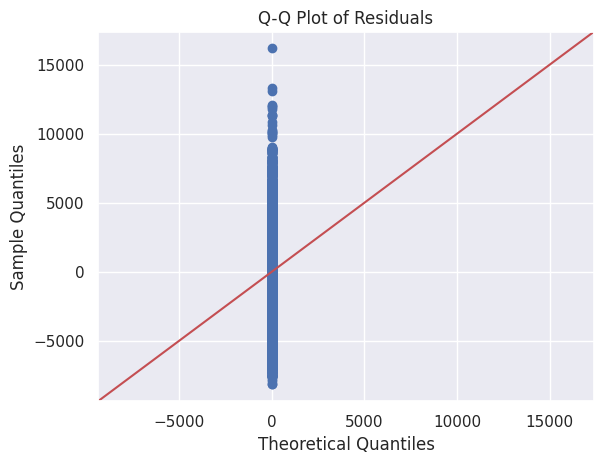

In [ ]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

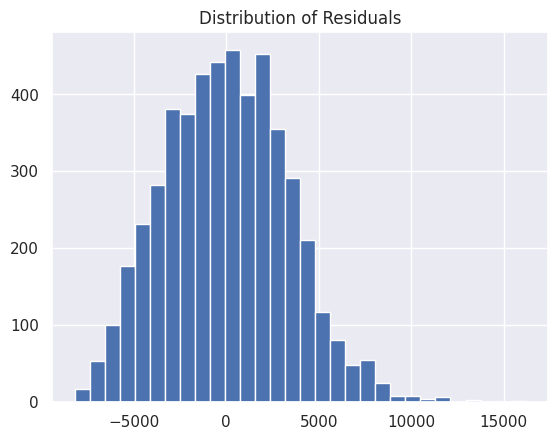

In [ ]:
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

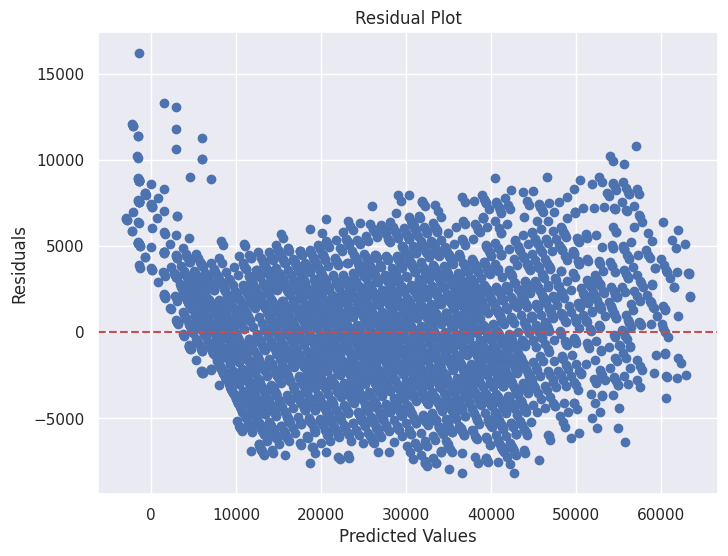

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

### Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
model_lin_scaled = sm.OLS(y_train, X_train).fit()

In [ ]:
y_pred_train_scaled = model_lin_scaled.predict(X_train)
y_pred_test_scaled = model_lin_scaled.predict(X_test)

### Evaluation - LR Tuned

In [ ]:
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 19189412.97
Root Mean Squared Error (RMSE), Train: 30523.81
R-squared (R²), Train: -930089031.451
Adjusted R-squared, Train: -931579633.396


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 20075500.81
Root Mean Squared Error (RMSE), Test: 30430.38
R-squared (R²), Test: -932485247.270
Adjusted R-squared, Test: -938492802.725


### Residual Analysis - LR Tuned

In [ ]:
y_test.shape

(5000, 1)

In [ ]:
residuals = y_test - y_pred_test

ValueError: x and y must be the same size

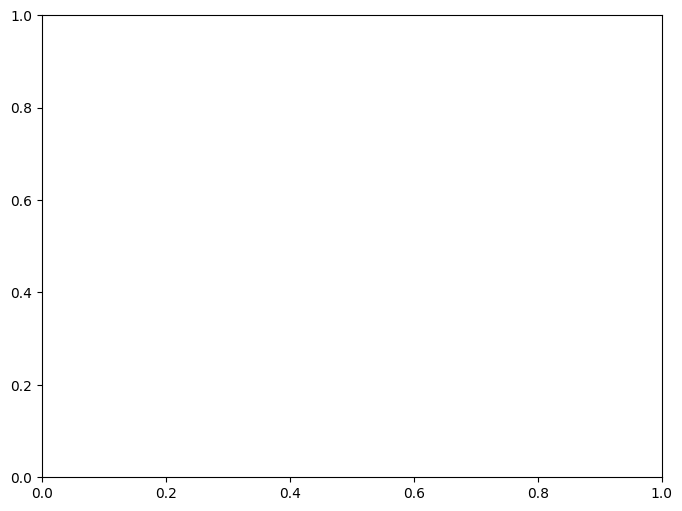

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

### Equation Building

In [ ]:
intercept = model_lin.params.iloc[0]
coefficients = model_lin.params.iloc[1]

In [ ]:
params = model_lin.params

In [ ]:
equation = f'y = {intercept:.2f} '
for i, col in enumerate(X_train.columns[1:]):
    equation += f'+ ({params.iloc[i+1]:.2f}) * {col} '

In [ ]:
print(equation)

y = -79927.84 + (-691.69) * regular_checkup_last_year + (3.24) * age + (1488.46) * weight + (157.61) * weight_change_in_last_one_year + (1172.85) * covered_by_any_other_company_Y 


## Polynomial Regression

### X, y split,  Train Test Split and Scaling

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building - PR

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

### Metrics - Degree 2

In [ ]:
y_pred_train = model_poly.predict(X_train_poly)
y_pred_test = model_poly.predict(X_test_poly)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.14
Root Mean Squared Error (RMSE), Train: 3166.36
R-squared (R²), Train: 0.951
Adjusted R-squared, Train: 0.951


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.14
Root Mean Squared Error (RMSE), Test: 3237.03
R-squared (R²), Test: 0.949
Adjusted R-squared, Test: 0.948


### Residual Analysis - PR Degree 2

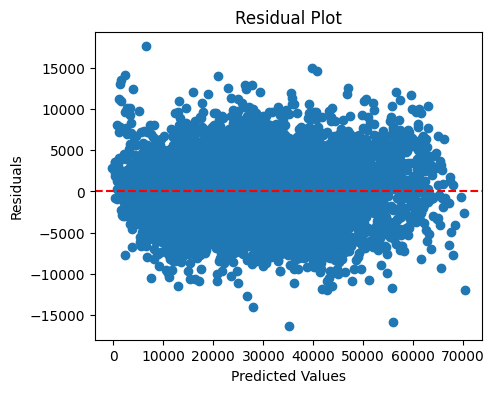

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

### Degree 3 and Test Size 0.3

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model_poly3 = LinearRegression()
model_poly3.fit(X_train_poly, y_train)

LinearRegression()

### Metrics Degree 3

In [ ]:
y_pred_train = model_poly3.predict(X_train_poly)
y_pred_test = model_poly3.predict(X_test_poly)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.11
Root Mean Squared Error (RMSE), Train: 2683.32
R-squared (R²), Train: 0.965
Adjusted R-squared, Train: 0.965


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.16
Root Mean Squared Error (RMSE), Test: 3795.34
R-squared (R²), Test: 0.929
Adjusted R-squared, Test: 0.929


### Residual Analysis - PR

In [ ]:
residuals = y_test - y_pred_test

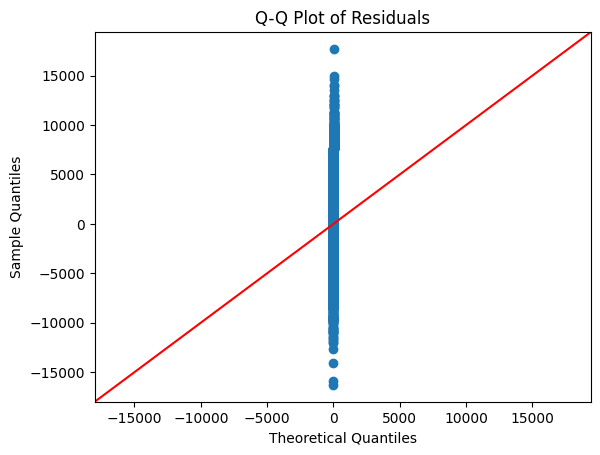

In [ ]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

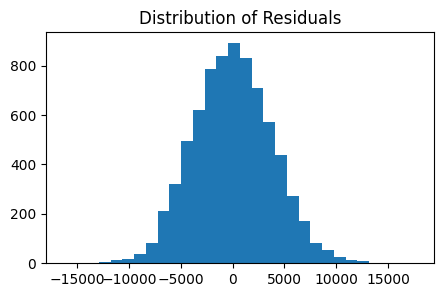

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

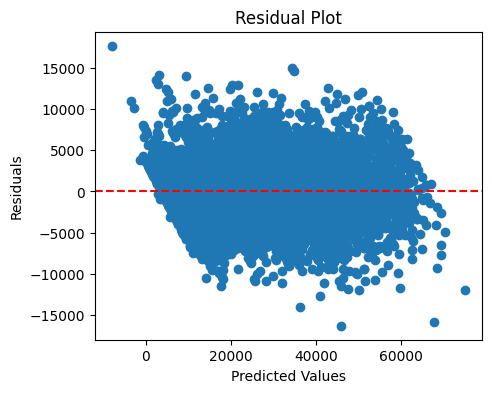

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

## Ridge Regularization

### X, y split, Train Test Split and Scaling

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

### Evaluation -  Ridge

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.15
Root Mean Squared Error (RMSE), Train: 3363.70
R-squared (R²), Train: 0.945
Adjusted R-squared, Train: 0.945


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.16
Root Mean Squared Error (RMSE), Test: 3369.25
R-squared (R²), Test: 0.944
Adjusted R-squared, Test: 0.944


### Residual Analysis - Ridge

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

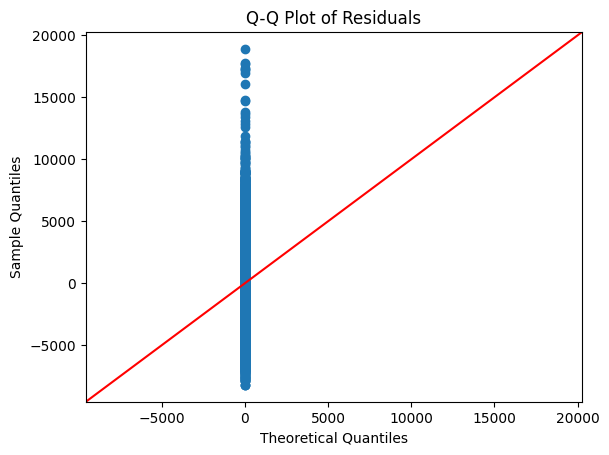

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

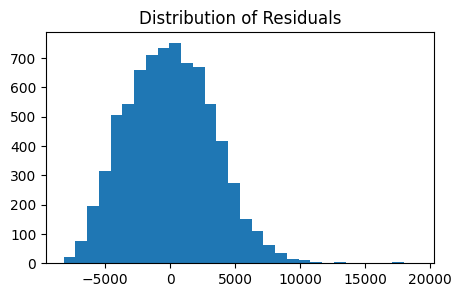

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

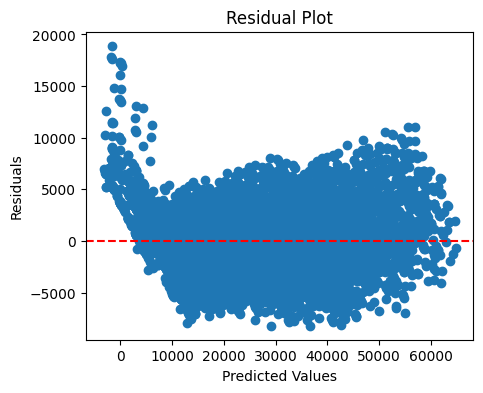

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

## Lasso Regularization

### X, y split, Train Test Split and Scaling

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building

In [ ]:
lasso = Lasso(alpha=0.1)

In [ ]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

### Evaluation -  Lasso

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.15
Root Mean Squared Error (RMSE), Train: 3363.70
R-squared (R²), Train: 0.945
Adjusted R-squared, Train: 0.945


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.16
Root Mean Squared Error (RMSE), Test: 3369.24
R-squared (R²), Test: 0.944
Adjusted R-squared, Test: 0.944


### Residual Analysis - Lasso

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

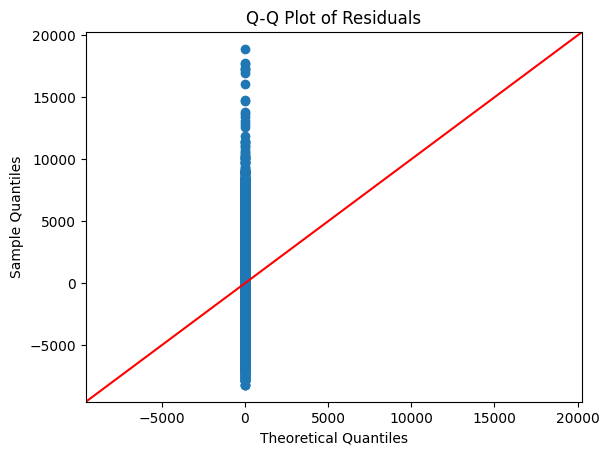

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

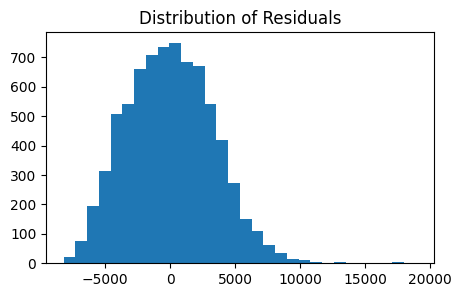

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

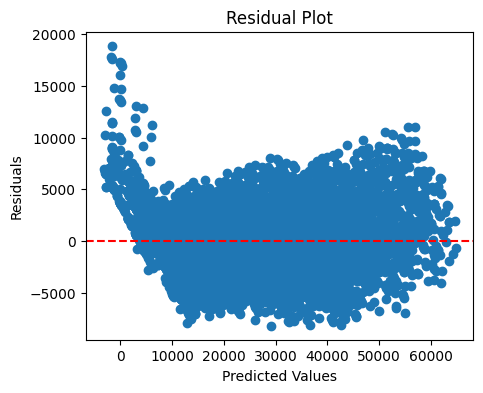

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

# Non-Parametric Models

## Random Forest Regressor

### X, y split, Train Test Split

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluation -  RF

In [ ]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.05
Root Mean Squared Error (RMSE), Train: 1173.47
R-squared (R²), Train: 0.993
Adjusted R-squared, Train: 0.993


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.12
Root Mean Squared Error (RMSE), Test: 3105.50
R-squared (R²), Test: 0.953
Adjusted R-squared, Test: 0.953


### Residual Analysis - RF

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

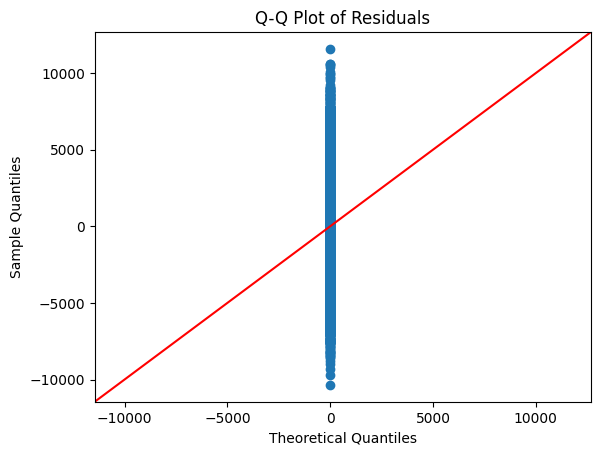

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

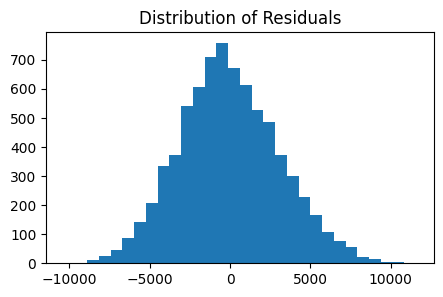

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

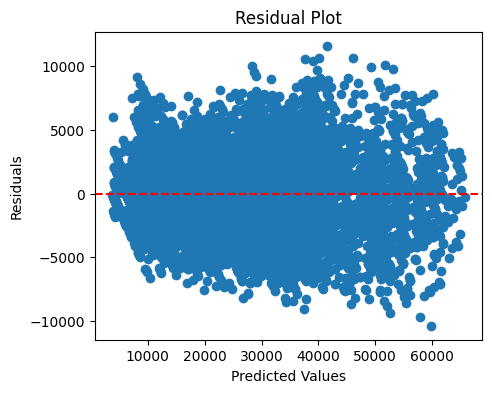

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

## XG Boost Regressor

### X, y split, Train Test Split

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(objective='reg:squarederror',max_depth=6,learning_rate=0.3,n_estimators=100,n_jobs=4)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import joblib

In [ ]:
joblib.dump(model_xgb, 'xgboost_regression.pkl')

['xgboost_regression.pkl']

### Evaluation - XGB

In [ ]:
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.09
Root Mean Squared Error (RMSE), Train: 2250.52
R-squared (R²), Train: 0.975
Adjusted R-squared, Train: 0.975


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.13
Root Mean Squared Error (RMSE), Test: 3150.64
R-squared (R²), Test: 0.951
Adjusted R-squared, Test: 0.951


### Residual Analysis - XGB

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

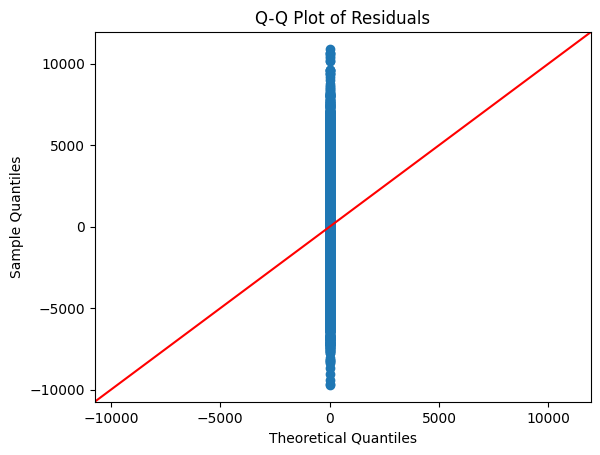

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

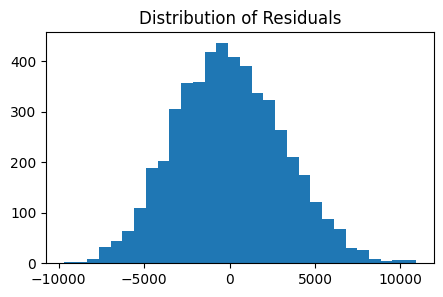

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

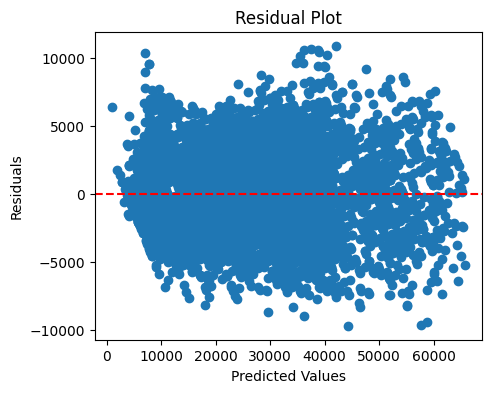

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

### Hyperparameter Tuning - XGB

In [ ]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200]
}

In [ ]:
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.3, ma...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=4, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

In [ ]:
print(f'Best parameters: {best_params}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### Evaluation - XGB Tuned

In [ ]:
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.12
Root Mean Squared Error (RMSE), Train: 2997.01
R-squared (R²), Train: 0.956
Adjusted R-squared, Train: 0.956


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.12
Root Mean Squared Error (RMSE), Test: 3001.52
R-squared (R²), Test: 0.956
Adjusted R-squared, Test: 0.956


### Residual Analysis - XGB Tuned

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

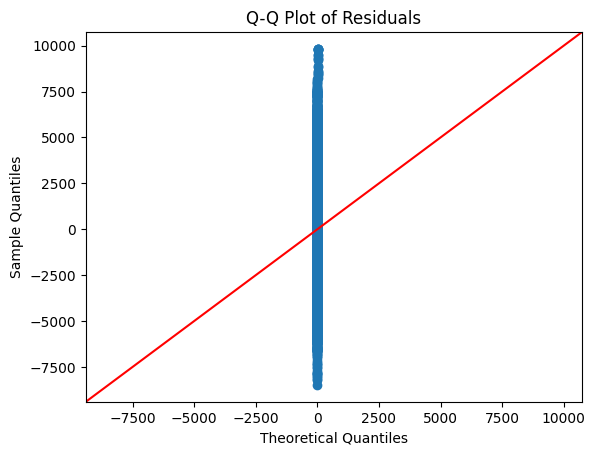

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

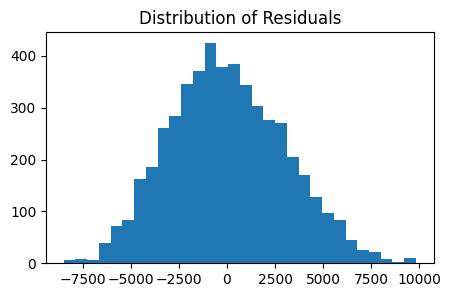

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

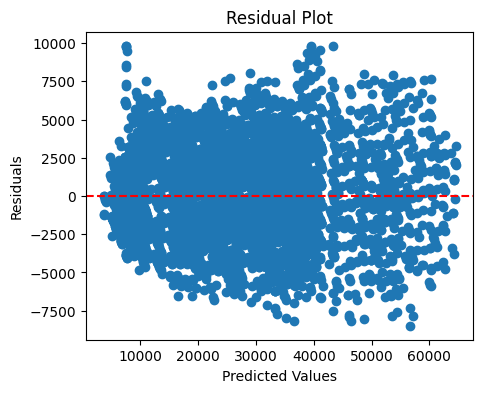

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

## Ada Boost Regression

### X, y split, Train Test Split & Scaling

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Building

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth=4)
ada_reg = AdaBoostRegressor(estimator=base_estimator, n_estimators=50, random_state=42)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), random_state=42)

### Evaluation - Adaboost

In [ ]:
y_pred_train = ada_reg.predict(X_train)
y_pred_test = ada_reg.predict(X_test)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.15
Root Mean Squared Error (RMSE), Train: 3172.80
R-squared (R²), Train: 0.951
Adjusted R-squared, Train: 0.951


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.15
Root Mean Squared Error (RMSE), Test: 3147.95
R-squared (R²), Test: 0.951
Adjusted R-squared, Test: 0.951


### Residual Analysis - Ada Boost

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

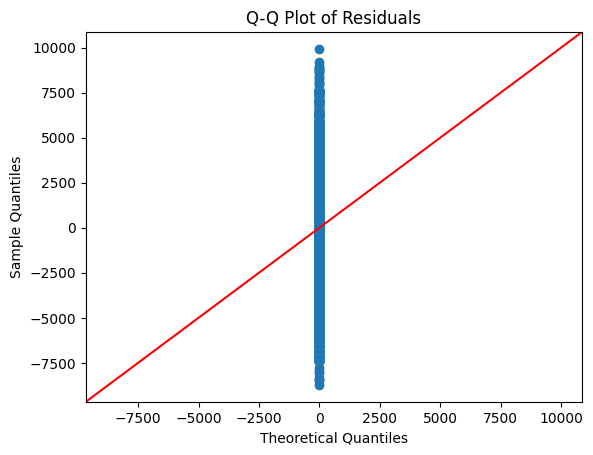

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

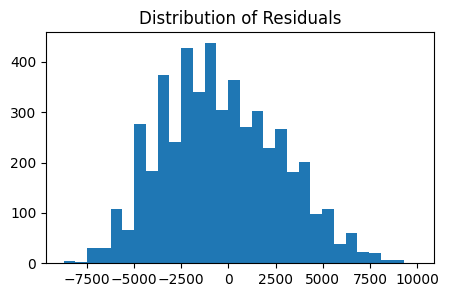

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

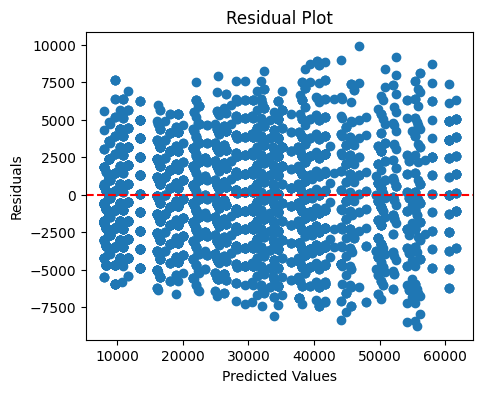

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

### Hyperparameter Tuning - Ada Boost

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'estimator__max_depth': [2, 3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(ada_reg, param_grid, scoring='r2', cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                         random_state=42),
             param_grid={'estimator__max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [ ]:
print(f"Best Params: {grid_search.best_params_}")

Best Params: {'estimator__max_depth': 5, 'n_estimators': 50}


In [ ]:
best_ada_model = grid_search.best_estimator_

### Evaluation - Ada Boost Tuned

In [ ]:
y_pred_train = best_ada_model.predict(X_train)
y_pred_test = best_ada_model.predict(X_test)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.15
Root Mean Squared Error (RMSE), Train: 3168.75
R-squared (R²), Train: 0.951
Adjusted R-squared, Train: 0.951


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.15
Root Mean Squared Error (RMSE), Test: 3181.84
R-squared (R²), Test: 0.950
Adjusted R-squared, Test: 0.950


### Residual Analysis - AdaBoost Tuned

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

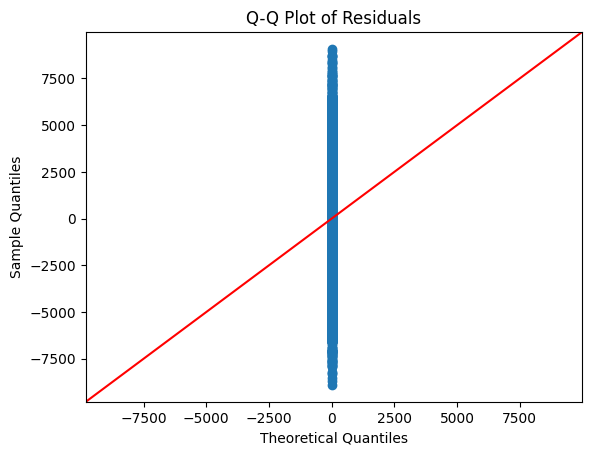

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

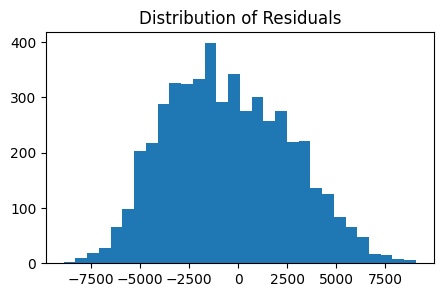

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

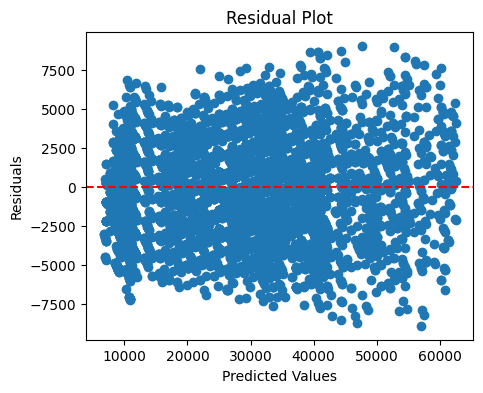

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

## SVM Regression

### X, y split, Train Test Split & Scaling

In [ ]:
from sklearn.svm import SVR

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building - SVR

In [ ]:
svr = SVR(C=0.1,gamma=0.1,kernel='rbf')
svr.fit(X_train_scaled, y_train)

SVR(C=0.1, gamma=0.1)

### Evaluation - SVR

In [ ]:
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train  = adjusted_r_squared(r2_train,n_train,p_train)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Train: {mape_train:.2f}")
print(f"Root Mean Squared Error (RMSE), Train: {rmse_train:.2f}")
print(f"R-squared (R²), Train: {r2_train:0.3f}")
print(f"Adjusted R-squared, Train: {adj_r2_train:0.3f}")

Mean Absolute Percentage Error (MAPE), Train: 0.80
Root Mean Squared Error (RMSE), Train: 14333.57
R-squared (R²), Train: 0.000
Adjusted R-squared, Train: -0.001


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test  = adjusted_r_squared(r2_test,n_test,p_test)

In [ ]:
print(f"Mean Absolute Percentage Error (MAPE), Test: {mape_test:.2f}")
print(f"Root Mean Squared Error (RMSE), Test: {rmse_test:.2f}")
print(f"R-squared (R²), Test: {r2_test:0.3f}")
print(f"Adjusted R-squared, Test: {adj_r2_test:0.3f}")

Mean Absolute Percentage Error (MAPE), Test: 0.80
Root Mean Squared Error (RMSE), Test: 14271.47
R-squared (R²), Test: 0.000
Adjusted R-squared, Test: -0.006


### Residual Analysis - SVR

In [ ]:
residuals = y_test - y_pred_test

<Figure size 600x400 with 0 Axes>

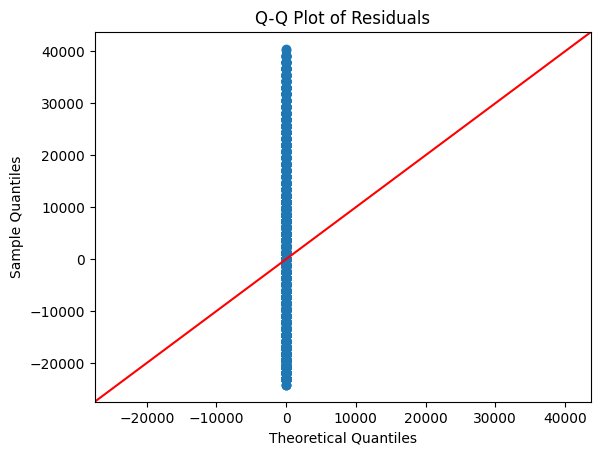

In [ ]:
plt.figure(figsize=(6, 4));
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals');

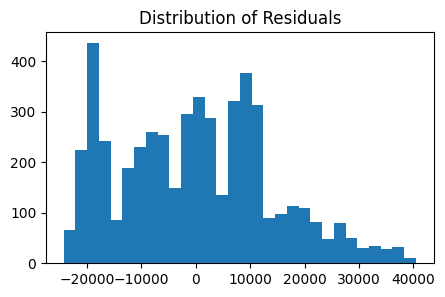

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals');

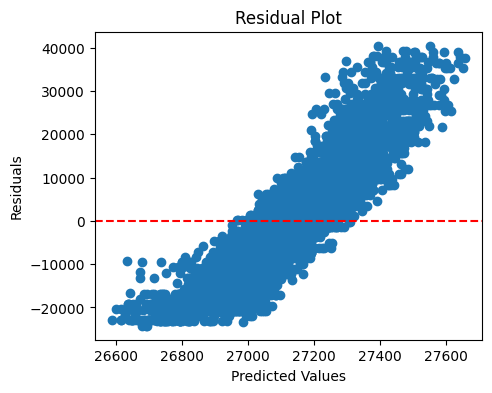

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

## Chosen Model - Random Forest

### Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = dfEncoded.drop('insurance_cost', axis=1)
y = dfEncoded['insurance_cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_rf_chosen = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model_rf_chosen.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Important Features

In [ ]:
importances = model_rf_chosen.feature_importances_
feature_names = X_train.columns

In [ ]:
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

print(feature_importances_df.head())

              Feature  Importance
10             weight    0.951700
4     daily_avg_steps    0.005892
8   avg_glucose_level    0.005730
9                 bmi    0.005575
5                 age    0.005060


## Chosen Model - XG Boost Tuned

### Model Building

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb_chosen = XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=100)

In [ ]:
model_xgb_chosen.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Important Features

In [ ]:
importances = model_xgb_chosen.feature_importances_
feature_names = X_train.columns

In [ ]:
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

print(feature_importances_df.head())

                           Feature  Importance
10                          weight    0.966296
23  covered_by_any_other_company_Y    0.010731
1        regular_checkup_last_year    0.006597
11  weight_change_in_last_one_year    0.003783
0       years_of_insurance_with_us    0.001728


## Analysis of Important Features

### With Target Variable

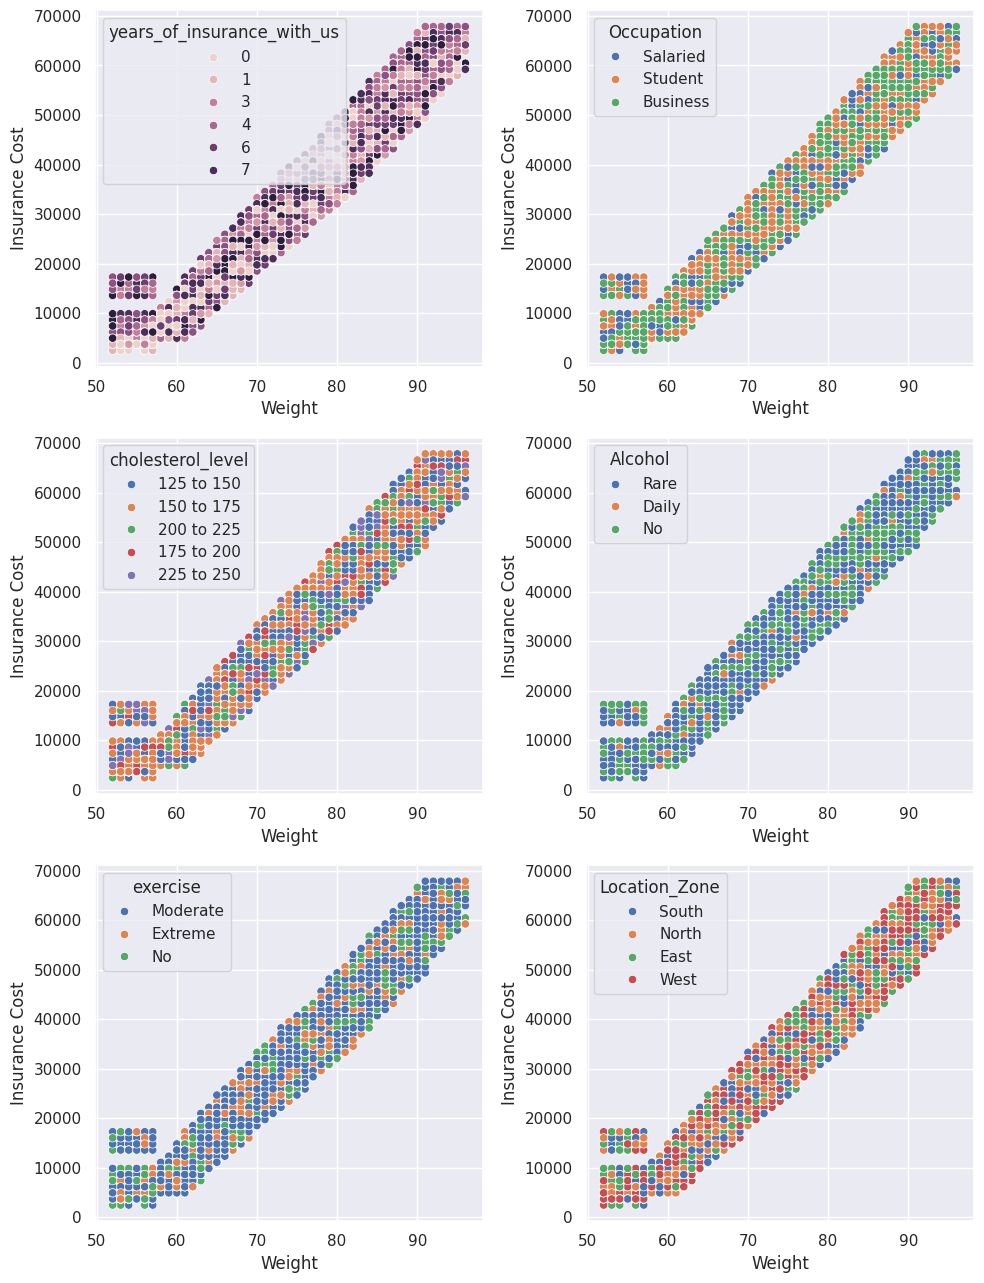

In [ ]:
sns.set_theme(style="darkgrid")
features = ['years_of_insurance_with_us','Occupation','cholesterol_level','Alcohol','exercise','Location_Zone']
plt.figure(figsize=(10, 13))

for i, col in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=df, x='weight', y='insurance_cost', hue=col)
    plt.xlabel('Weight')
    plt.ylabel('Insurance Cost')
    # plt.title(f'Insurance Cost vs. Weight ({col})')

plt.tight_layout()
plt.show()

### With Numerical Variables

In [ ]:
var_numerical = ['insurance_cost','years_of_insurance_with_us','regular_checkup_last_year','daily_avg_steps','age',\
               'visited_doctor_last_1_year','avg_glucose_level','bmi','weight','weight_change_in_last_one_year',\
               'fat_percentage']

In [ ]:
titles_numerical = [name.replace('_',' ').upper() for name in var_numerical]

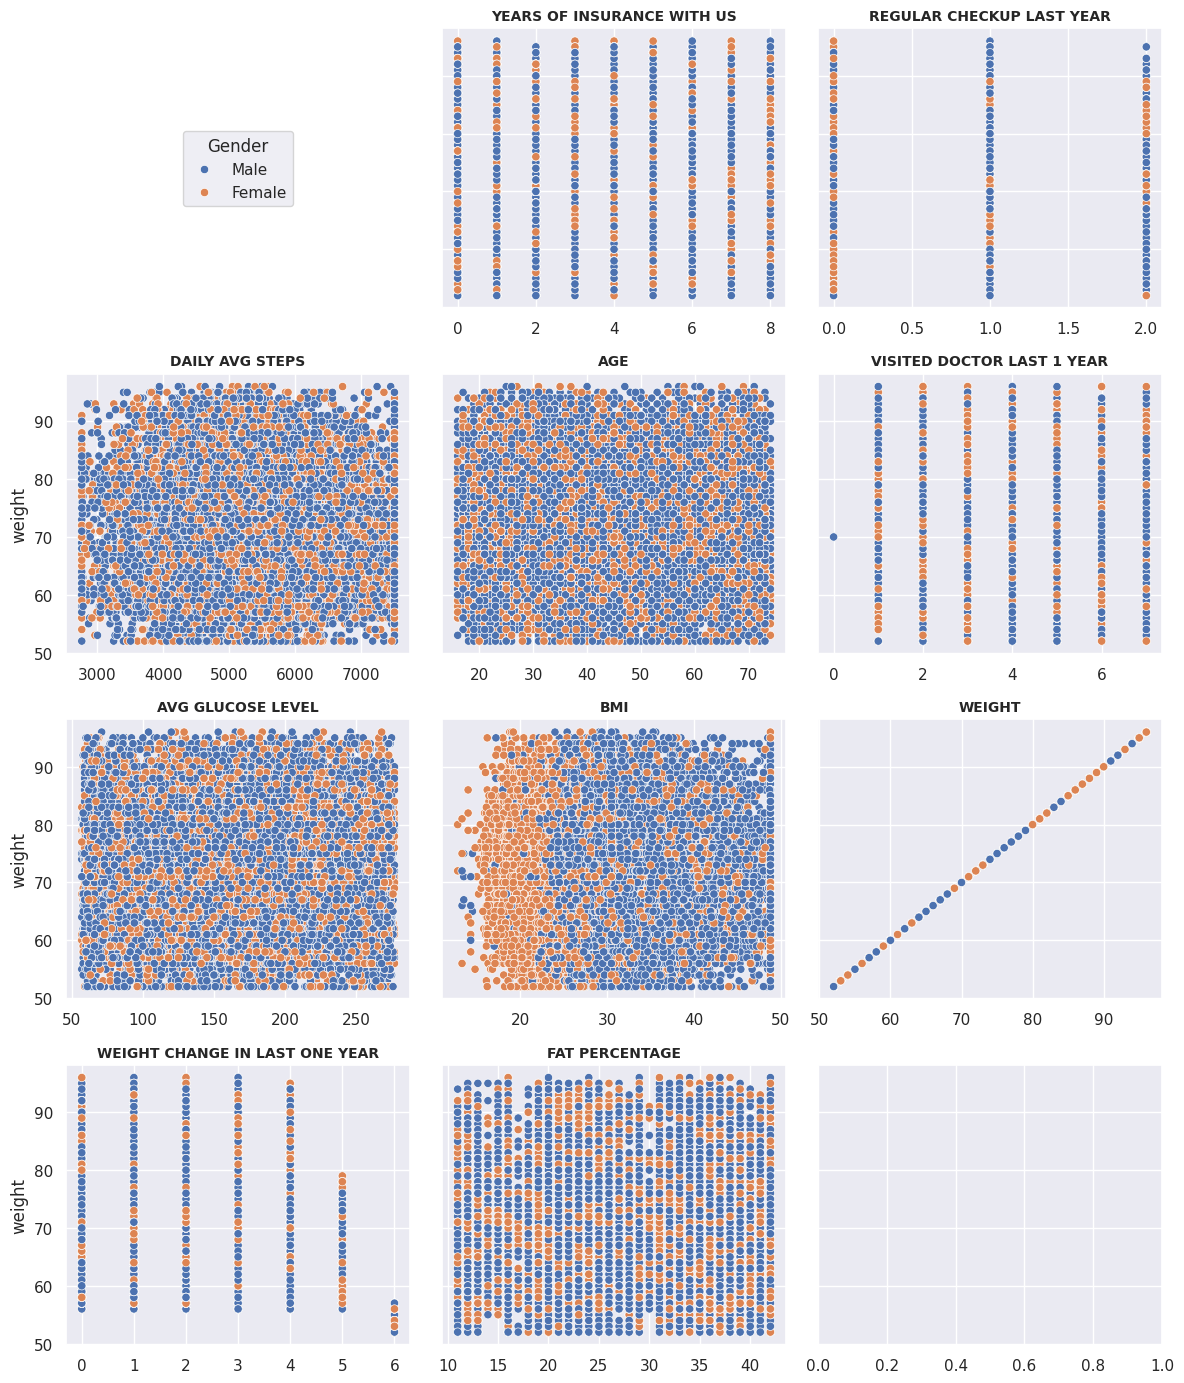

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(12, 14), sharey=True)
handles = None
labels = None

for i, (col, ax) in enumerate(zip(var_numerical, axes.flatten()), 1):
    if i == 1:
        ax.axis('off')
    else:
        sns.scatterplot(data=df, x=col, y='weight', hue='Gender', ax=ax)
        ax.set_title(titles_numerical[i-1].upper(), fontsize=10, fontweight='bold')
        ax.set_xlabel(None)

        if handles is None and labels is None:
            handles, labels = ax.get_legend_handles_labels()
        ax.legend().remove()
        axes[0, 0].legend(handles, labels, title="Gender", loc='center')

axes[0, 0].legend(handles, labels, title="Gender", loc='center')

plt.tight_layout()
plt.show()

### With Categorical Variables

In [ ]:
var_categorical = ['adventure_sports','Occupation','cholesterol_level','heart_decs_history',\
                 'other_major_decs_history','Gender','smoking_status','Location_Zone','covered_by_any_other_company',\
                'Alcohol','exercise',]

In [ ]:
titles_categorical = [name.replace('_',' ').upper() for name in var_categorical]

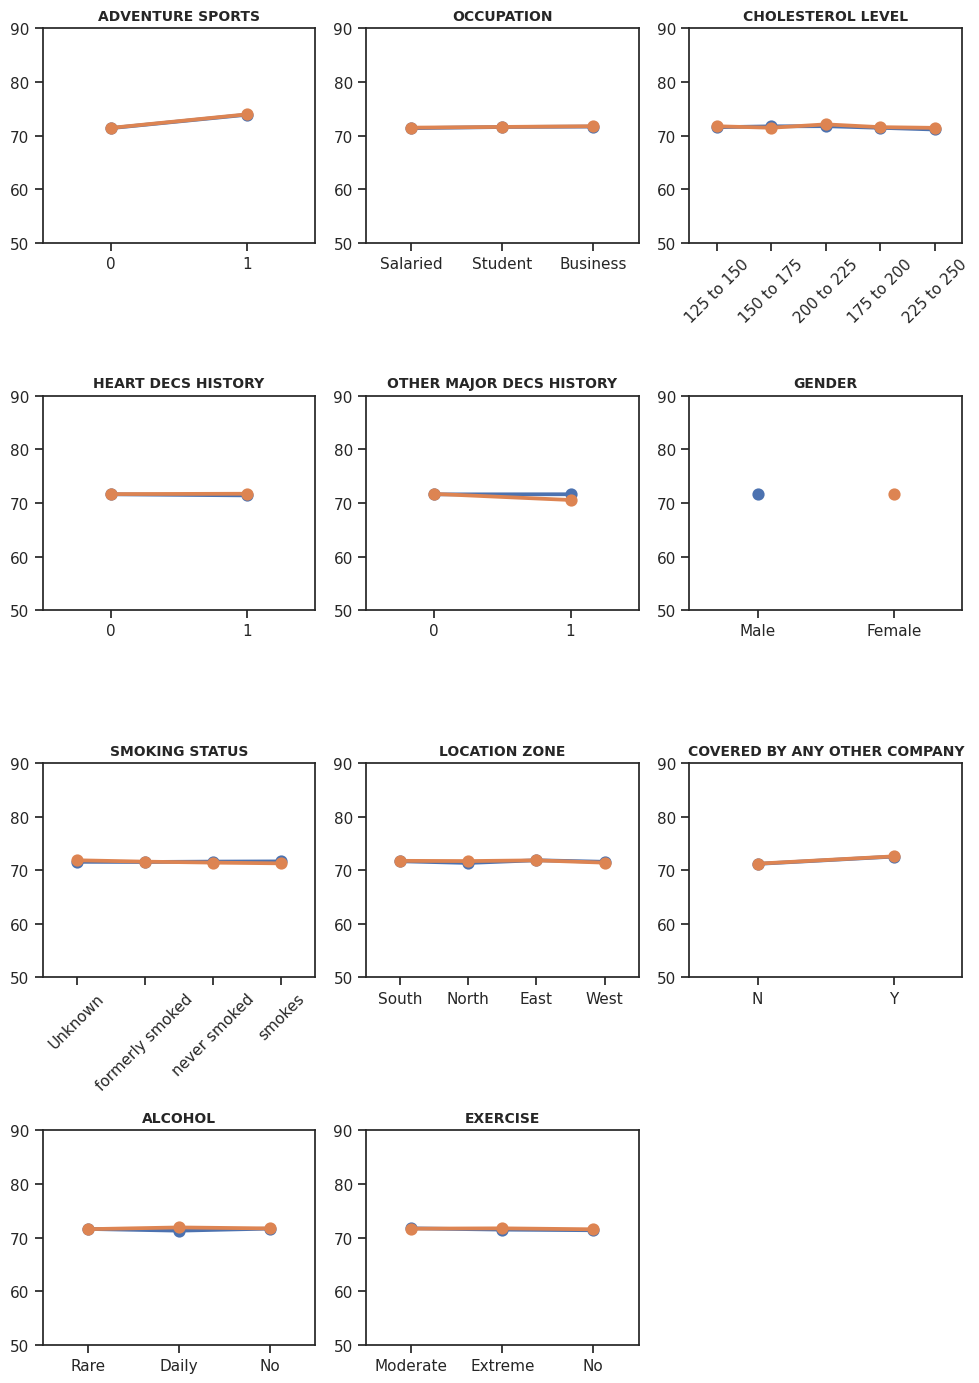

In [ ]:
sns.set_theme(style="ticks")
rotate = ['cholesterol_level', 'smoking_status']
plt.figure(figsize=(10,14))
for i, col in enumerate(var_categorical, 1):
    ax = plt.subplot(4,3,i)
    sns.pointplot(data=df, x=col, y='weight', hue='Gender', ax=ax, legend=False, errorbar=None)
    plt.title(titles_categorical[i-1], fontsize=10, fontweight='bold')
    plt.xlabel(None)
    plt.ylabel(None)
    ax.set_ylim(50,90)
    if col in rotate:
        plt.xticks(rotation=45)
# plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'Occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'Gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'weight', 'covered_by_any_other_company', 'Alcohol',
       'exercise', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost', 'Location_Zone'],
      dtype='object')